In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
final_fig_path = "../Figures/"

In [3]:
np.exp(1)

2.718281828459045

In [2]:
'''
Functional response to a prey type
the number of prey caught per predator group
i indicates which prey, 1 = big prey, 2 = small prey
'''
def fun_response(x,M1,M2,i,h1,h2,a1,a2,θ1, θ2,x0):
    α1 = attackrate_sigmoid1(x,a1,θ1,x0)
    α2 = attackrate_sigmoid1(x,a2,θ2,x0)
    
    if i == 1:
        numerator = M1*α1
    elif i == 2:
        numerator = M2*α2
    else:
        print("Invalid prey type i")
    denominator = 1 + h1*α1*M1 + h2*α2*M2
    return numerator/denominator

'''
the sigmoidal attack rate
This is the option that uses e
'''
def attackrate_sigmoid1(x,a,θ,x0):
    return a/(1+np.exp(-θ*(x-x0)))
    

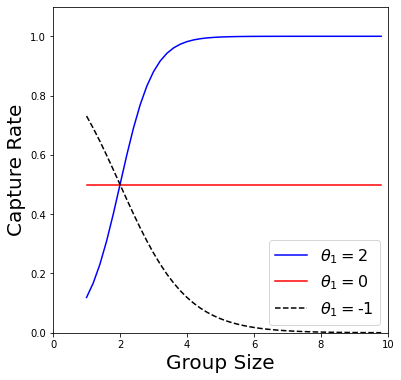

In [5]:
x_inputs = np.arange(1,10,0.2)
x0 = 2
a = 1

plt.figure(figsize=(6,6))
θ_a = 2
plt.plot(x_inputs, attackrate_sigmoid1(x_inputs,a,θ_a,x0), 'b', label = r'$\theta_1 =$%d'%θ_a)

θ_b = 0
plt.plot(x_inputs, attackrate_sigmoid1(x_inputs,a,θ_b,x0), 'r', label = r'$\theta_1 =$%d'%θ_b)

θ_c = -1
plt.plot(x_inputs, attackrate_sigmoid1(x_inputs,a,θ_c,x0), '--k', label = r'$\theta_1 =$%d'%θ_c)

plt.xlabel('Group Size', fontsize = 20)
plt.ylabel('Capture Rate', fontsize = 20)
plt.ylim(0,1.1)
plt.xlim([0,10])
plt.legend(fontsize=16)

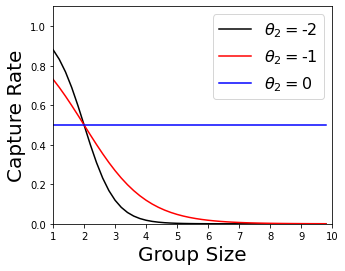

In [8]:
x_inputs = np.arange(1,10,0.2)
x0 = 2
a = 1

plt.figure(figsize=(5,4))
θ = -2
plt.plot(x_inputs, attackrate_sigmoid1(x_inputs,a,θ,x0), 'k', label = r'$\theta_2 =$%d'%θ)

θ = -1
plt.plot(x_inputs, attackrate_sigmoid1(x_inputs,a,θ,x0), 'r', label = r'$\theta_2 =$%d'%θ)

θ = 0
plt.plot(x_inputs, attackrate_sigmoid1(x_inputs,a,θ,x0), 'b', label = r'$\theta_2 =$%d'%θ)

plt.xlabel('Group Size', fontsize = 20)
plt.ylabel('Capture Rate', fontsize = 20)
plt.ylim(0,1.1)
plt.xlim([1,10])
plt.legend(fontsize=16)

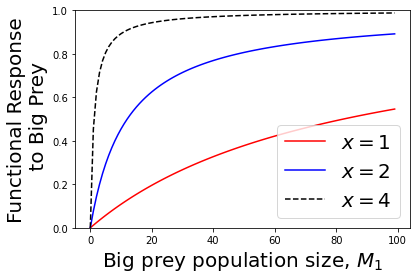

In [6]:
x_inputs = np.arange(1,10,1)
M1 = np.arange(0,100,1)
M2 = 10
i = 1
h1 = 1
h2 = 1
a1 = 1
a2 = 1
θ1 = 2
θ2 = -2
x0 = 2


x=1
plt.plot(M1,fun_response(x,M1,M2,i,h1,h2,a1,a2,θ1, θ2,x0),'r', label = r'$x=$%d'%x)

x=2
plt.plot(M1,fun_response(x,M1,M2,i,h1,h2,a1,a2,θ1, θ2,x0),'b', label = r'$x=$%d'%x)

x=4
plt.plot(M1,fun_response(x,M1,M2,i,h1,h2,a1,a2,θ1, θ2,x0),'--k', label = r'$x=$%d'%x)
plt.ylim([0,1])
plt.legend(fontsize=20)
plt.xlabel(r'Big prey population size, $M_1$', fontsize = 20)
plt.ylabel('Functional Response\n to Big Prey', fontsize = 20)
plt.savefig(final_fig_path + 'Fun_response_1_theta_2_neg2.png', bbox_inches = 'tight')

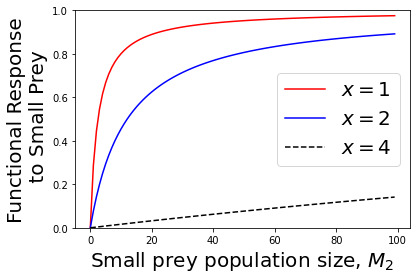

In [7]:
M1 = 10
M2 = np.arange(0,100,1)
i=2
x=1
plt.plot(M2,fun_response(x,M1,M2,i,h1,h2,a1,a2,θ1, θ2,x0),'r', label = r'$x=$%d'%x)

x=2
plt.plot(M2,fun_response(x,M1,M2,i,h1,h2,a1,a2,θ1, θ2,x0),'b', label = r'$x=$%d'%x)

x=4
plt.plot(M2,fun_response(x,M1,M2,i,h1,h2,a1,a2,θ1, θ2,x0),'--k', label = r'$x=$%d'%x)

plt.legend(fontsize=20)
plt.ylim([0,1])
plt.xlabel(r'Small prey population size, $M_2$', fontsize = 20)
plt.ylabel('Functional Response\n to Small Prey', fontsize = 20)
plt.savefig(final_fig_path + 'Fun_response_2_theta_2_neg2.png', bbox_inches = 'tight')

# Now we want per-individual fitness from each prey type, after even sharing

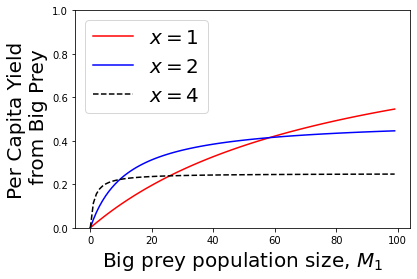

In [9]:
x_inputs = np.arange(1,10,1)
M1 = np.arange(0,100,1)
M2 = 10
i = 1
h1 = 1
h2 = 1
a1 = 1
a2 = 1
θ1 = 2
θ2 = -2
x0 = 2


x=1
plt.plot(M1,fun_response(x,M1,M2,i,h1,h2,a1,a2,θ1, θ2,x0)/x,'r', label = r'$x=$%d'%x)

x=2
plt.plot(M1,fun_response(x,M1,M2,i,h1,h2,a1,a2,θ1, θ2,x0)/x,'b', label = r'$x=$%d'%x)

x=4
plt.plot(M1,fun_response(x,M1,M2,i,h1,h2,a1,a2,θ1, θ2,x0)/x,'--k', label = r'$x=$%d'%x)
plt.ylim([0,1])
plt.legend(fontsize=20)
plt.xlabel(r'Big prey population size, $M_1$', fontsize = 20)
plt.ylabel('Per Capita Yield\n from Big Prey', fontsize = 20)
plt.savefig(final_fig_path + 'Yield_perpred_1_theta_2_neg2.png', bbox_inches = 'tight')

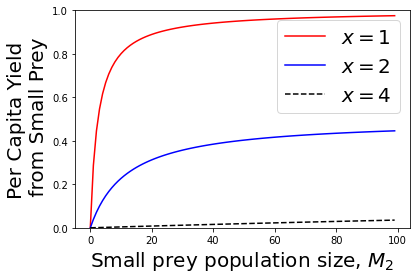

In [11]:
M1 = 10
M2 = np.arange(0,100,1)
i=2
x=1
plt.plot(M2,fun_response(x,M1,M2,i,h1,h2,a1,a2,θ1, θ2,x0)/x,'r', label = r'$x=$%d'%x)

x=2
plt.plot(M2,fun_response(x,M1,M2,i,h1,h2,a1,a2,θ1, θ2,x0)/x,'b', label = r'$x=$%d'%x)

x=4
plt.plot(M2,fun_response(x,M1,M2,i,h1,h2,a1,a2,θ1, θ2,x0)/x,'--k', label = r'$x=$%d'%x)

plt.legend(fontsize=20)
plt.ylim([0,1])
plt.xlabel(r'Small prey population size, $M_2$', fontsize = 20)
plt.ylabel('Per Capita Yield\n from Small Prey', fontsize = 20)
plt.savefig(final_fig_path + 'Yield_perpred_2_theta_2_neg2.png', bbox_inches = 'tight')

Effective Yields per Group Size

In [9]:
# plot the Y1/x, Y2/x, and (Y1/(Y1+Y2))/x, and then (1/x)\bar{w} for different group sizes, varying theta1, theta2, and then s_1, s_2